In [18]:
from classiq import*
import matplotlib.pyplot as plt
import numpy as np


## Random Walk

It is a classical aspect in which each step a walker chooses to take is random and unpredictable,such that the probability of choosing any step has equal probability.For example,Tossing a coin means that there is equal probability for getting a head or a tail.Likewise,the probability of the walker choosing a step forward(+1) or backward(-1) is equal.

## Quantum Walk

Quantum Walk is similar to Random walk,but in the quantum aspect.Here each position for the walker is a superposition of integer eigenstates.In order to create such superposed states, a 'coin operator' is used,which distributes equal probability to the neighbouring states.This means that the walker has equal probability of moving to either of its nearest states.Another Operator that is utilized is the 'Shift operator' which shifts the walker from one state to the other.This algorithm is useful for providing an exponential sped-up performance as compared to the random walk which gives a linear performance.

# Problem

The objective is to design a Quantum walk operator in case of a line with 16 nodes.Here,it is to be noted that the nodes in-between are connected to their respective two adjacent nodes while the first and last nodes are only connected to one adjacent node.So,a logic to connect these nodes must be incorporated in the code.Hence,in order to represent 16 nodes,4 qubits need to be created and the size is set to 4.

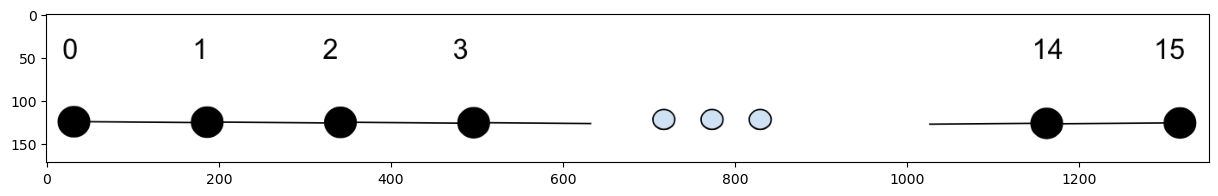

In [30]:

plt.figure(figsize=(15,15))
img_0=plt.imread('Classiq_FinalAssignment_Fig1.png')
plt.imshow(img_0)


The two equations given below are equations of the primary operators that is needed to perform our desired quantum walk.The first equation is that of the Coin operator(C),which determines the probability of the walker's next move.The second equation is that of Shift Operator(S) which shifts the position of the walker from one state to the other.These equations and their logic is implemented in the code.

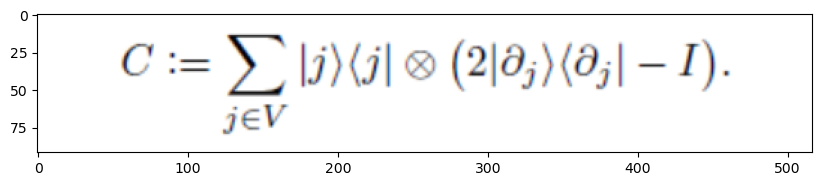

In [34]:
plt.figure(figsize=(10,10))
img_1=plt.imread('Coin eq.png')
plt.imshow(img_1)

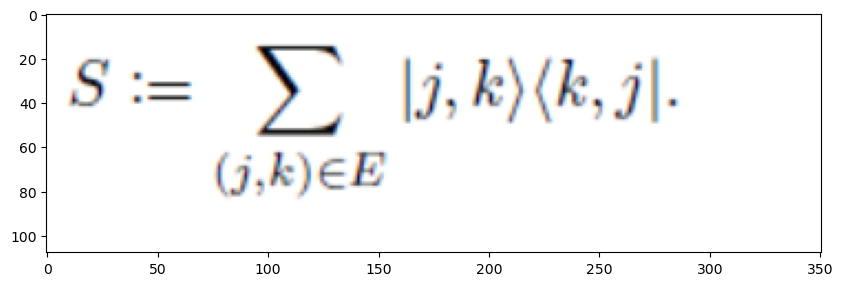

In [33]:
plt.figure(figsize=(10,10))
img_1=plt.imread('S eq.png')
plt.imshow(img_1)

In [19]:
size = 4
@qfunc
def prepare_minus(x: QBit): #prepare_minus function
  H(x)
  X(x)


In [20]:
@qfunc
def diffuzer_oracle(aux: Output[QNum],x:QNum): #diffuser_oracle function
  aux^=(x!=0)


In [21]:

@qfunc
def zero_diffuzer(x: QNum):  #zero_diffuser function
  aux = QNum('aux')
  allocate(1,aux)
  within_apply(compute=lambda: prepare_minus(aux),
              action=lambda: diffuzer_oracle)


Here the functions defined above are used to implement phase kickback which is a part of the equation of Coin operator.

In [22]:
def C_iteration(i:int,vertices: QNum, adjacent_vertices:QNum): #Probability distribution by Coin operation
    prob = [0]*16    #Setting the iteration of probability distribution by Coin operation
    if i==0:
         prob[(i+1)]=1        #C_operator distributing probability=1 to the first and last nodes
    elif i==15:               
        prob[(i-1)]=1  
    else:
        prob[(i+1)]=0.5     #C_operator distributing probability=0.5 to adjacent nodes
        prob[(i-1)]=0.5
        
    print(f'State={i}, prob vec ={prob}')
    
    control(ctrl=vertices==i,
            operand=lambda: within_apply(
              compute= lambda: inplace_prepare_state(probabilities=prob, bound=0.01, target=adjacent_vertices),
              action= lambda: zero_diffuzer(adjacent_vertices)))

In [23]:

@qfunc 
def C_operator(vertices:QNum, adjacent_vertices: QNum): 
    for i in range(2**size):                             #C_Operator is applied to all the nodes.
      C_iteration(i,vertices,adjacent_vertices)


In [24]:
#Initiation of Implementing the Shift operator
@qfunc
def edge_oracle(res:Output[QBit], vertices: QNum, adjacent_vertices: QNum): #edge_oracle function
      res |=((vertices-adjacent_vertices)**2) ==1    #Checks if adjacent vertices are connected,if connected,the qubit sets to 1

In [41]:
@qfunc 
def bitwise_swap(x: QArray[QBit], y:QArray[QBit]): #bitwise_swap function
  repeat(count= x.len,iteration= lambda i: SWAP(x[i],y[i])) #Swaps the bits indicating movement of the walker.Works only when the vertices are connected

In [26]:

@qfunc 
def S_operator(vertices:QNum, adjacent_vertices: QNum): #Shift operator function
    res = QNum('res')
    edge_oracle(res,vertices,adjacent_vertices)  #Incorporating the edge_oracle and bitwise_swap function in the S_operator()
    control(ctrl= res==1,
        operand= lambda: bitwise_swap(vertices,adjacent_vertices))


In [27]:
@qfunc 
def main(vertices:Output[QNum], adjacent_vertices:Output[QNum]):

  allocate(size,vertices)
  hadamard_transform(vertices) #Implementing Hadamard transform to vertices to create equally probable superposed states
  allocate(size,adjacent_vertices) # Allocating each qubit to respective vertices

  C_operator(vertices,adjacent_vertices) #Implementing Coin and shift operators to get the desired quantum walk
  S_operator(vertices,adjacent_vertices)

In [28]:
qmod = create_model(main)
qprog = synthesize(qmod)
show(qprog)

State=0, prob vec =[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
State=1, prob vec =[0.5, 0, 0.5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
State=2, prob vec =[0, 0.5, 0, 0.5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
State=3, prob vec =[0, 0, 0.5, 0, 0.5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
State=4, prob vec =[0, 0, 0, 0.5, 0, 0.5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
State=5, prob vec =[0, 0, 0, 0, 0.5, 0, 0.5, 0, 0, 0, 0, 0, 0, 0, 0, 0]
State=6, prob vec =[0, 0, 0, 0, 0, 0.5, 0, 0.5, 0, 0, 0, 0, 0, 0, 0, 0]
State=7, prob vec =[0, 0, 0, 0, 0, 0, 0.5, 0, 0.5, 0, 0, 0, 0, 0, 0, 0]
State=8, prob vec =[0, 0, 0, 0, 0, 0, 0, 0.5, 0, 0.5, 0, 0, 0, 0, 0, 0]
State=9, prob vec =[0, 0, 0, 0, 0, 0, 0, 0, 0.5, 0, 0.5, 0, 0, 0, 0, 0]
State=10, prob vec =[0, 0, 0, 0, 0, 0, 0, 0, 0, 0.5, 0, 0.5, 0, 0, 0, 0]
State=11, prob vec =[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.5, 0, 0.5, 0, 0, 0]
State=12, prob vec =[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.5, 0, 0.5, 0, 0]
State=13, prob vec =[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.5, 0, 

# Circuit Diagrams

Here is the full implementation of the quantum walk

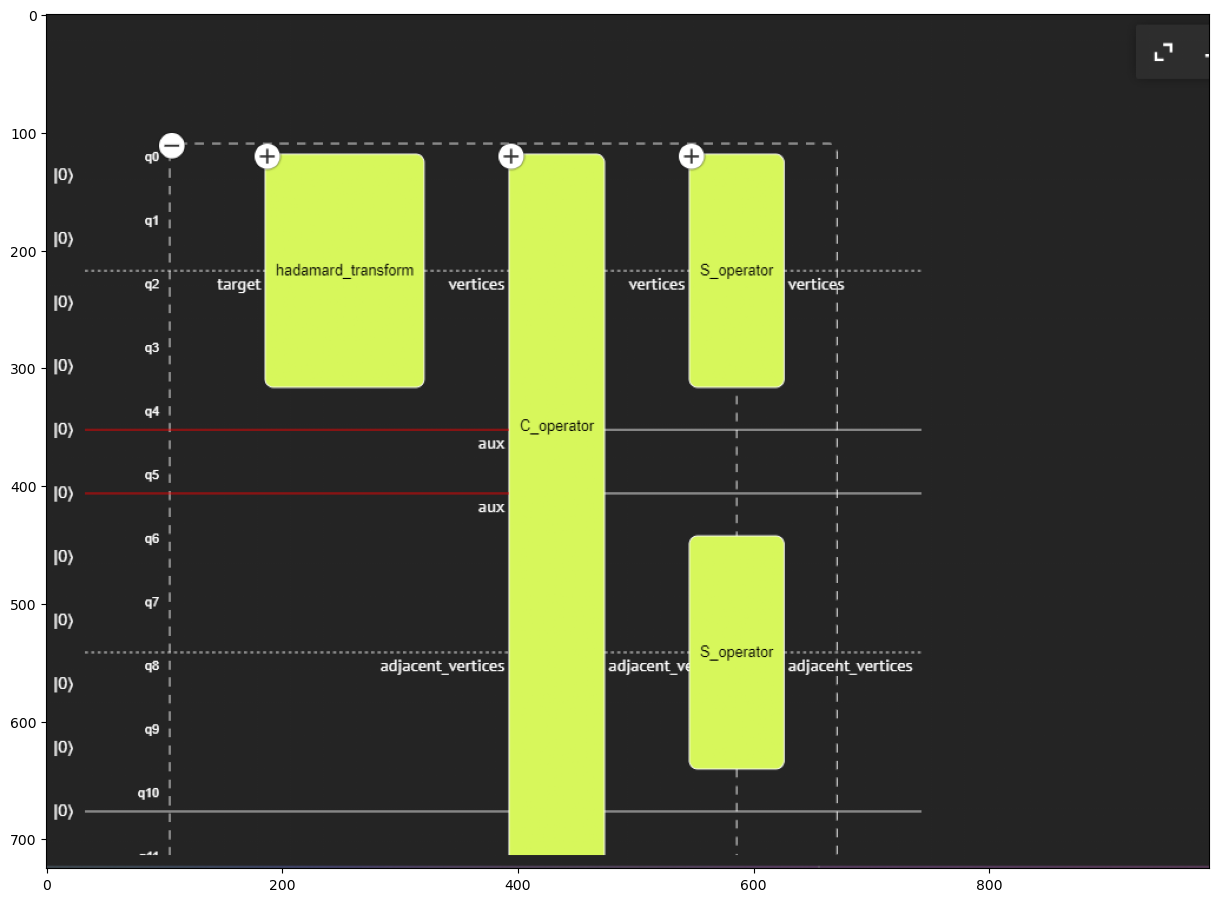

In [40]:
plt.figure(figsize=(15,15))
img4=plt.imread('final circuit.png')
plt.imshow(img4)

# C operator Ciruit Diagram

C operator is applied for 16 nodes,this is just a segment of C operator.Here state_prepation sets the probability for
walker to move to adjacent node as we seen in the output.Zero diffuser ensures to amplify the desired probability amplitudes using phas kickback

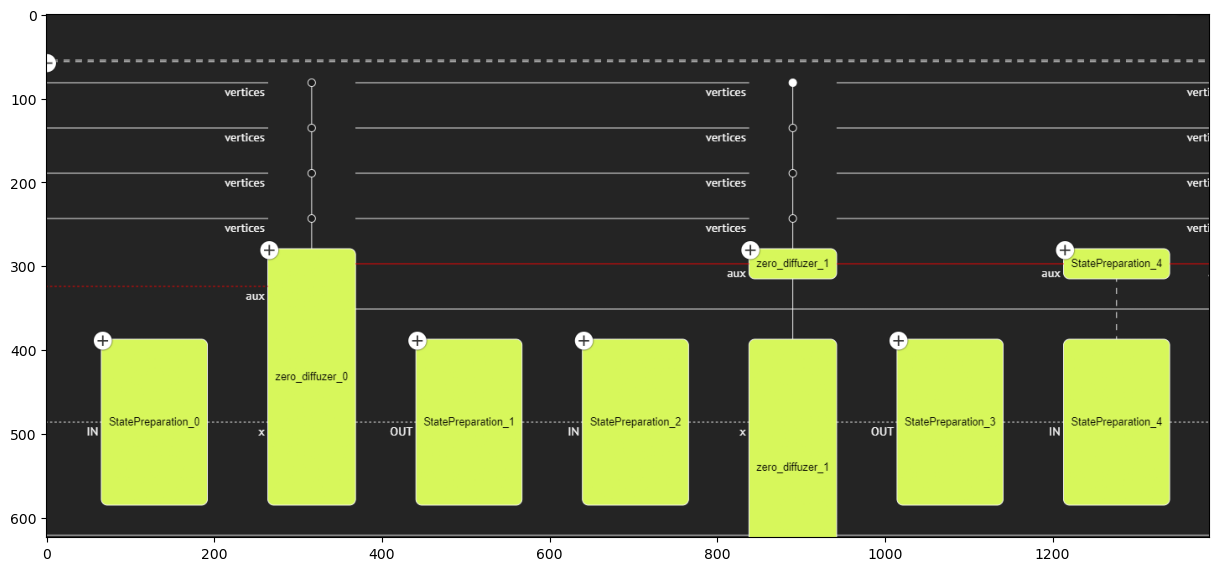

In [35]:
plt.figure(figsize=(15,15))
img5=plt.imread('C_expansion.png')
plt.imshow(img5)

# Shift operator circuit diagram

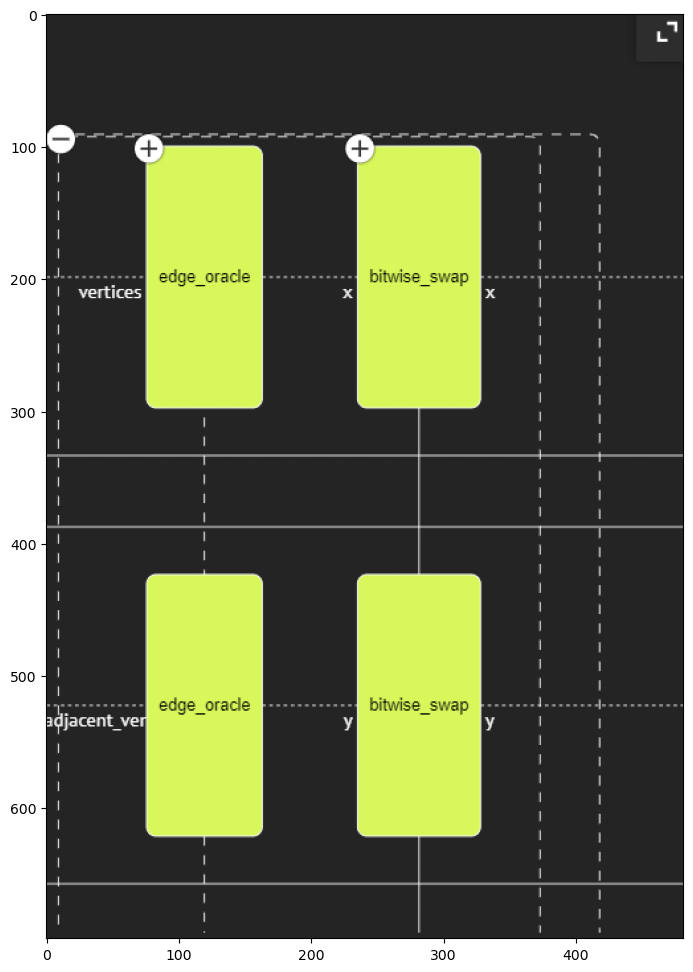

In [39]:
plt.figure(figsize=(14,12))
img5=plt.imread('S_expansion.png')
plt.imshow(img5)